# Comparison Between Core, RC, and Trenches Datasets
---

The purpose of this notebook is explore the differences and similarities between core, Rc and trenches datasets, and see if the correlation pattern is uniform across the datasets.

## Imports

Before we start, we import the needed python libraries and load the datasets into the data frames. 

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Optional: make plots appear inside notebooks
%matplotlib inline


In [22]:
core = pd.read_csv("../1_datasets/processed/core_simplified.csv")
rc = pd.read_csv("../1_datasets/processed/rc_simplified.csv")
trenches = pd.read_csv("../1_datasets/processed/trenches_simplified.csv")

# See visual of the data frame
core.head(10)

,Sample ID,Au,Ag,As,Bi,Cu,Pb,Sb,Zn
0,C0001,0.01,0.10,1.1,0.23,25.8,10.6,<0.05,74
1,C0002,0.02,0.18,22.4,1.13,31.7,30.1,0.32,67
2,C0003,0.01,0.10,1.3,0.52,17.6,23.3,<0.05,51
3,C0004,<0.01,0.10,3.8,0.44,14.9,18.7,<0.05,47
4,C0005,0.13,0.19,36.3,2.82,26.0,43.2,0.06,81
5,C0006,<0.01,0.09,3.3,0.22,25.1,17.4,<0.05,94
6,C0007,<0.01,0.09,1.1,0.17,20.5,9.5,<0.05,39
7,C0008,<0.01,0.15,3.3,0.49,37.3,15.1,0.1,71
8,C0009,<0.01,0.08,6.2,0.16,31.3,14.2,0.05,88
9,C0010,0.01,0.45,12.0,0.09,8.6,11.0,0.93,105


In [23]:
# Display the frame data types
pd.DataFrame({
    "core": core.dtypes,
    "rc": rc.dtypes,
    "trenches": trenches.dtypes
})

,core,rc,trenches
Sample ID,object,object,object
Au,object,object,object
Ag,float64,object,float64
As,float64,object,float64
Bi,float64,float64,float64
Cu,float64,float64,float64
Pb,float64,float64,float64
Sb,object,object,object
Zn,int64,int64,int64


Column Au and Sb has non-numeric values due to "<" symbol in readings less than limit of detection

## Data Visualization

For the initial impression we graph scatter plots between the label (Au) and each of the feature (elements) to observe the general trend.

### Data treatment

Before plotting the data, we must address the “<” symbol used to indicate measurements below the analytical detection limit. This notation appears when the true concentration cannot be reliably quantified because it falls below the smallest value distinguishable from background noise. Since the actual value is unknown and can lie anywhere between 0 and the detection limit, we replace each “<” entry with a random number sampled uniformly between 0 and the detection limit. This allows the data to be visualized while preserving the uncertainty inherent in values below detection.

In [24]:
import random

def replace_DL_values(df):
    """
    Replace '<x' values with a random number between 0 and x.
    Convert columns to numeric EXCEPT 'Sample ID'.
    """
    for col in df.columns:

        # Step 1 — Replace <x values
        df[col] = df[col].apply(
            lambda val: round(random.uniform(0.001, float(val.replace('<', ''))), 3)
            if isinstance(val, str) and val.startswith('<')
            else val
        )

        # Step 2 — Convert to numeric EXCEPT Sample ID
        if col != "Sample ID":
            df[col] = pd.to_numeric(df[col], errors="coerce")   # converts bad values to NaN

    return df

# Apply to all dataframes
rc = replace_DL_values(rc)
core = replace_DL_values(core)
trenches = replace_DL_values(trenches)

# Check data frame to confirm
print("RC Dataset:")
display(rc.head())

print("\nCore Dataset:")
display(core.head())

print("\nTrenches Dataset:")
display(trenches.head())

RC Dataset:


,Sample ID,Au,Ag,As,Bi,Cu,Pb,Sb,Zn
0,R0001,0.002,0.03,2.9,0.13,29.1,13.1,0.250,98
1,R0002,0.009,0.01,0.1,0.02,3.4,14.2,0.044,5
2,R0003,0.006,0.03,3.0,0.15,28.6,13.1,0.260,98
3,R0004,0.004,0.04,0.9,0.03,24.8,7.1,0.060,35
4,R0005,0.001,0.04,1.5,0.10,48.0,6.6,0.110,83



Core Dataset:


,Sample ID,Au,Ag,As,Bi,Cu,Pb,Sb,Zn
0,C0001,0.010,0.10,1.1,0.23,25.8,10.6,0.034,74
1,C0002,0.020,0.18,22.4,1.13,31.7,30.1,0.320,67
2,C0003,0.010,0.10,1.3,0.52,17.6,23.3,0.018,51
3,C0004,0.006,0.10,3.8,0.44,14.9,18.7,0.007,47
4,C0005,0.130,0.19,36.3,2.82,26.0,43.2,0.060,81



Trenches Dataset:


,Sample ID,Au,Ag,As,Bi,Cu,Pb,Sb,Zn
0,T0001,1.76,0.72,1.3,1.63,13.1,181.5,0.11,112
1,T0002,0.08,0.04,1.0,0.12,6.3,31.0,0.12,49
2,T0003,0.05,0.04,1.9,0.18,4.0,20.1,0.12,30
3,T0004,0.91,0.51,1.2,1.46,7.6,94.2,0.11,34
4,T0005,0.59,0.07,7.9,0.14,28.9,91.2,0.23,270


In [25]:
# Display the modified frame data types
pd.DataFrame({
    "core": core.dtypes,
    "rc": rc.dtypes,
    "trenches": trenches.dtypes
})


,core,rc,trenches
Sample ID,object,object,object
Au,float64,float64,float64
Ag,float64,float64,float64
As,float64,float64,float64
Bi,float64,float64,float64
Cu,float64,float64,float64
Pb,float64,float64,float64
Sb,float64,float64,float64
Zn,int64,int64,int64


All features and label are now numeric. Now we can plot

### Scatter Plots & Correlations

Now we can plot the scatter plots after we replaced strings with numerical values. This will give us the first look at our dataset to see how gold concentration varies with each feature. To plot we implement the code below:

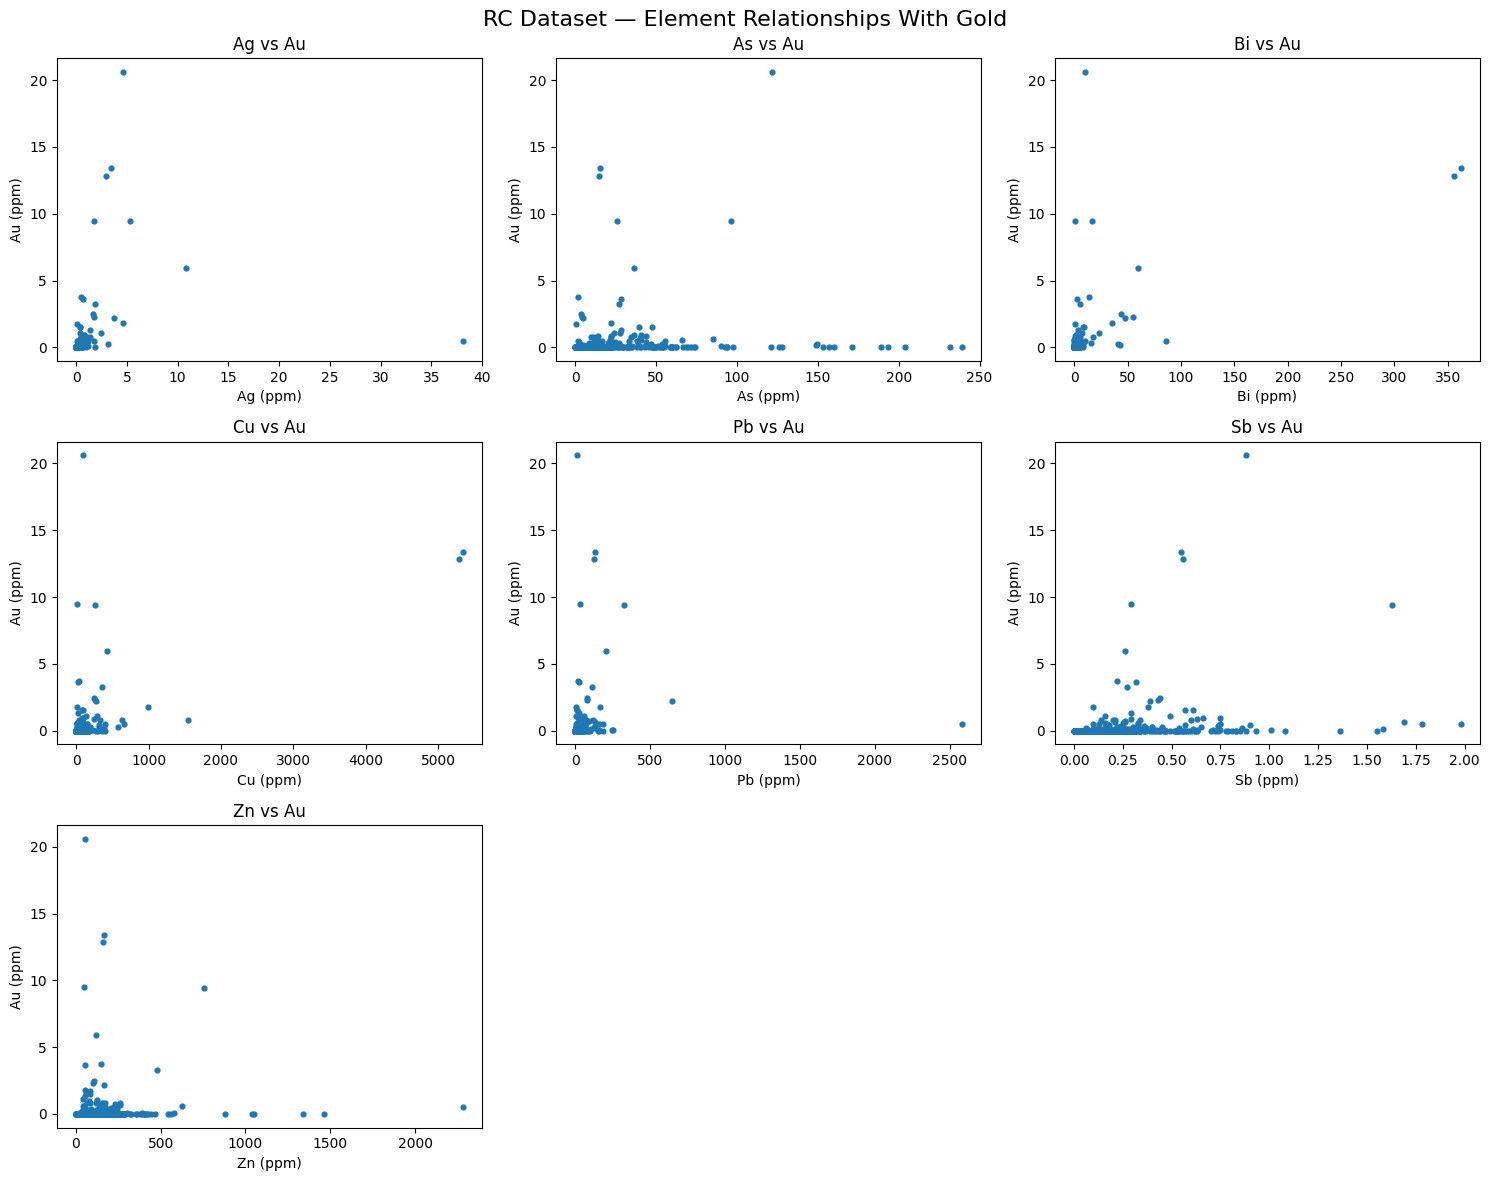

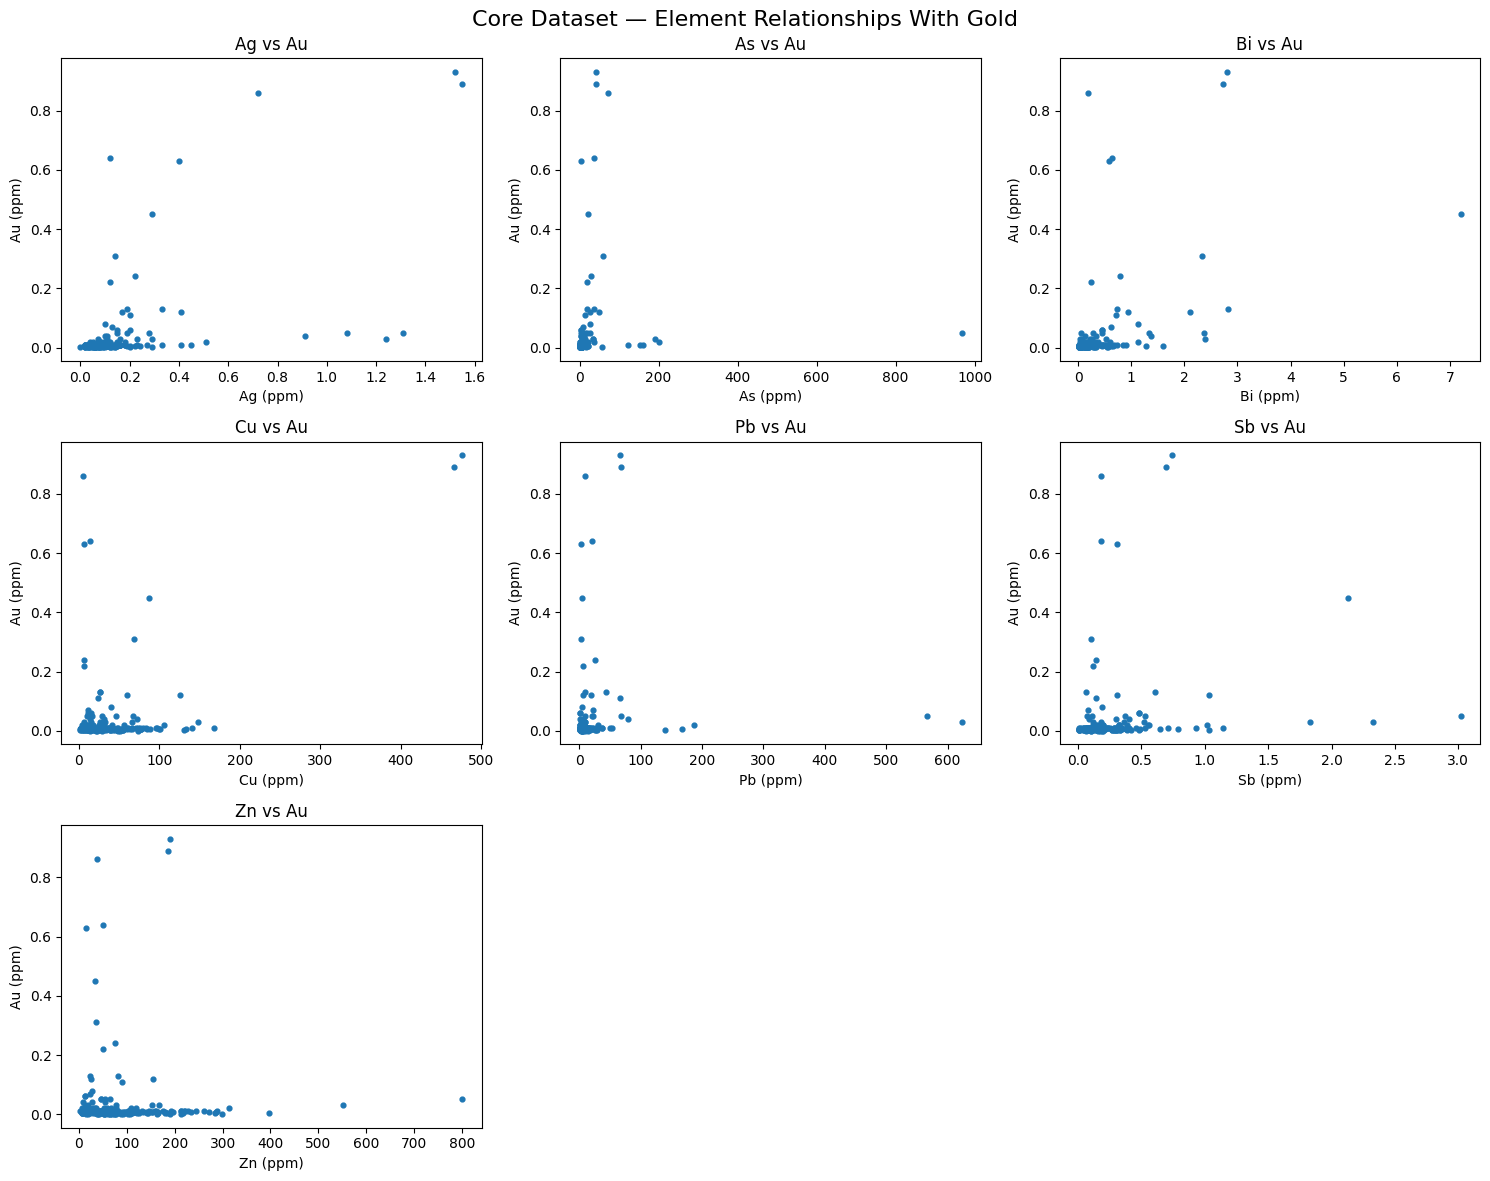

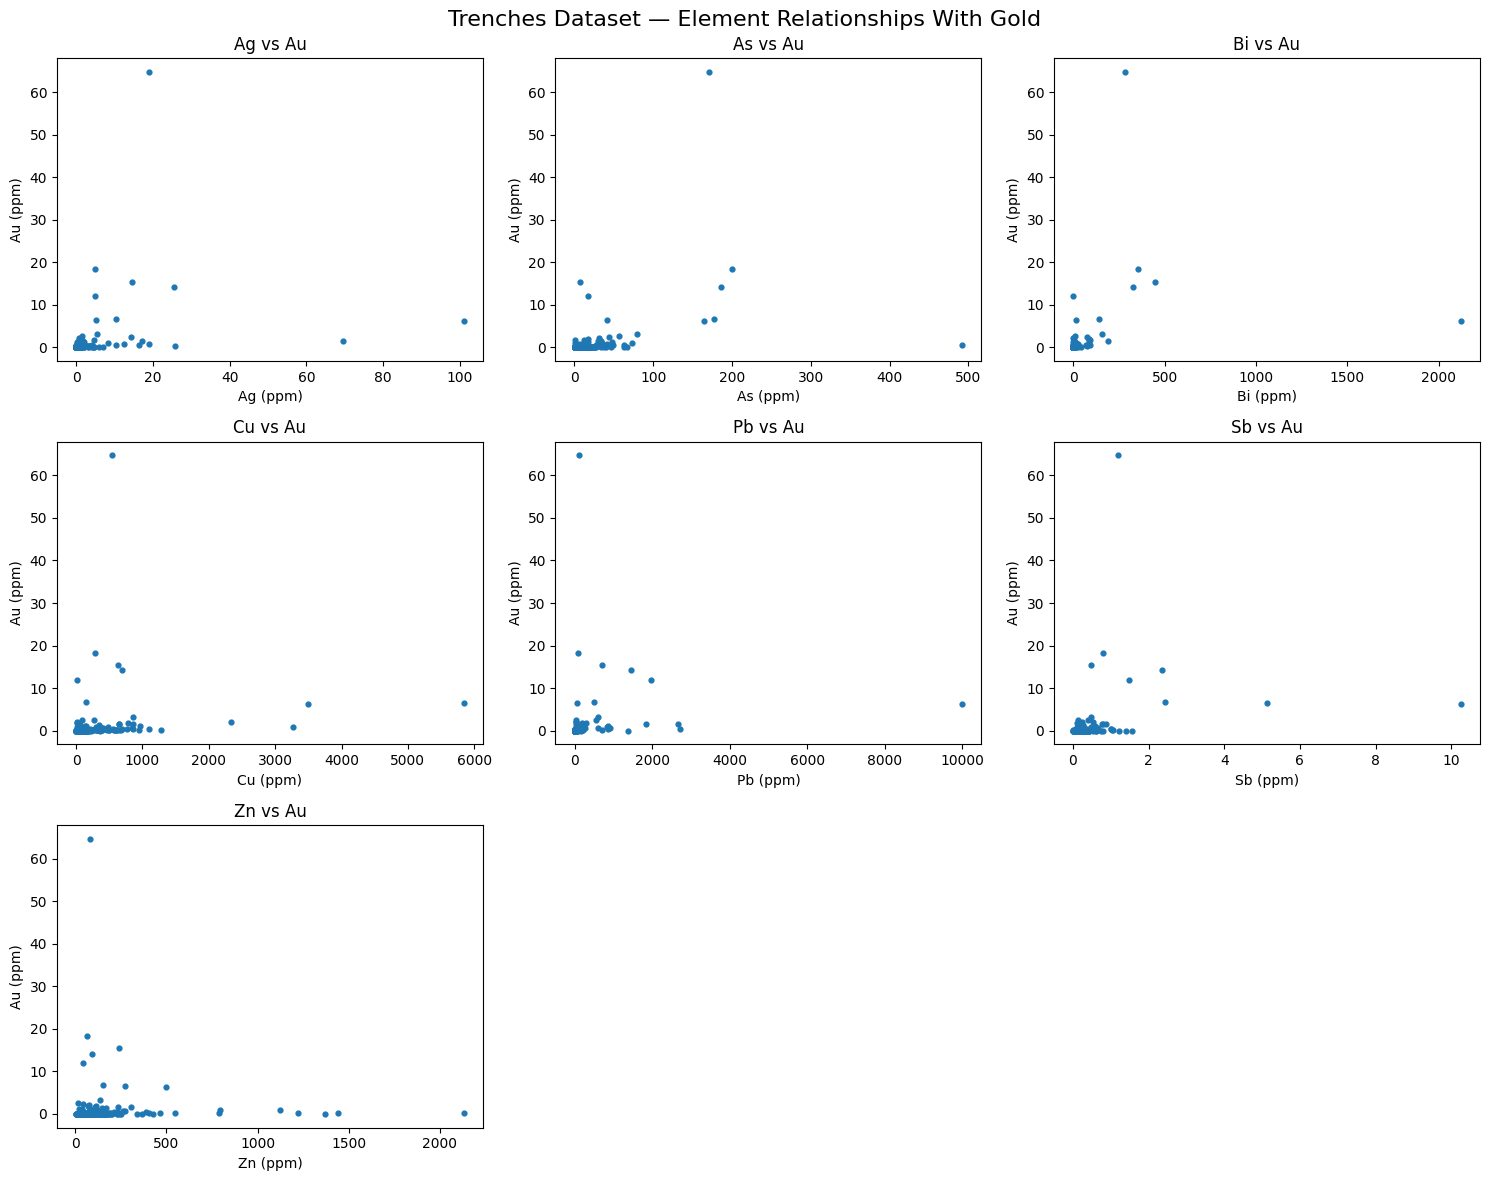

In [26]:
def plot_grid_features_vs_gold(df, title="Dataset"):
    """
    Plots all features vs Au in a clean grid layout.
    Assumes all assay columns are numeric except 'Sample ID'.
    """
    
    label = "Au"
    
    # All feature columns except Au and Sample ID
    features = [col for col in df.columns if col not in ["Sample ID", label]]

    cols = 3  # number of columns in the grid
    rows = (len(features) + cols - 1) // cols  # automatic rows

    fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        axes[i].scatter(df[feature], df[label], s=12)
        axes[i].set_xlabel(f"{feature} (ppm)")
        axes[i].set_ylabel("Au (ppm)")
        axes[i].set_title(f"{feature} vs Au")
    
    # Hide extra subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.suptitle(f"{title} — Element Relationships With Gold", fontsize=16)
    plt.tight_layout()
    plt.show()



# Plot for RC dataset
plot_grid_features_vs_gold(rc, "RC Dataset")

# Plot for Core dataset
plot_grid_features_vs_gold(core, "Core Dataset")

# Plot for Trenches dataset
plot_grid_features_vs_gold(trenches, "Trenches Dataset")

Looking the plots, there does not seem to be a strong linear correlation or detectable pattern, most of the values are concentrated near zero. Bi show slightly higher linear association overall. Now we look at the correlation coefficients. 

In [27]:
features = ['Ag', 'As', 'Bi', 'Cu', 'Pb', 'Sb', 'Zn']

core_corr = core[features].corrwith(core['Au'])
rc_corr = rc[features].corrwith(rc['Au'])
trenches_corr = trenches[features].corrwith(trenches['Au'])

correlations = pd.DataFrame({
    'Core': core_corr,
    'RC': rc_corr,
    'Trenches': trenches_corr
})
print(correlations)



        Core        RC  Trenches
Ag  0.595356  0.270466  0.280401
As  0.093496  0.171246  0.415286
Bi  0.506484  0.619198  0.307329
Cu  0.532563  0.586816  0.187170
Pb  0.066075  0.129439  0.156151
Sb  0.197236  0.256634  0.262475
Zn -0.000789  0.061769  0.024838


We can remove some of the near zero observations and see if the correlation coefficients will improve.

In [28]:
cutoff = 0.02

cutoff_core      = core[core.Au >= cutoff]
cutoff_rc        = rc[rc.Au >= cutoff]
cutoff_trenches  = trenches[trenches.Au >= cutoff]

core_corr = cutoff_core[features].corrwith(cutoff_core['Au'])
rc_corr = cutoff_rc[features].corrwith(cutoff_rc['Au'])
trenches_corr = cutoff_trenches[features].corrwith(cutoff_trenches['Au'])

correlations = pd.DataFrame({
    'Core': core_corr,
    'RC': rc_corr,
    'Trenches': trenches_corr
})
print(correlations)

        Core        RC  Trenches
Ag  0.511147  0.227072  0.266889
As -0.022439  0.282056  0.404481
Bi  0.403661  0.601256  0.299199
Cu  0.609151  0.573032  0.164292
Pb -0.051610  0.081629  0.145017
Sb  0.034202  0.260016  0.251789
Zn  0.001993  0.073178  0.003375


There is no improvement after imposing a cutoff on gold values.
Next is to combine the data frames into a single data frame and observe the overall correlation.

In [29]:
combined = pd.concat([core, rc, trenches], ignore_index=True)
combined.shape

(1734, 9)

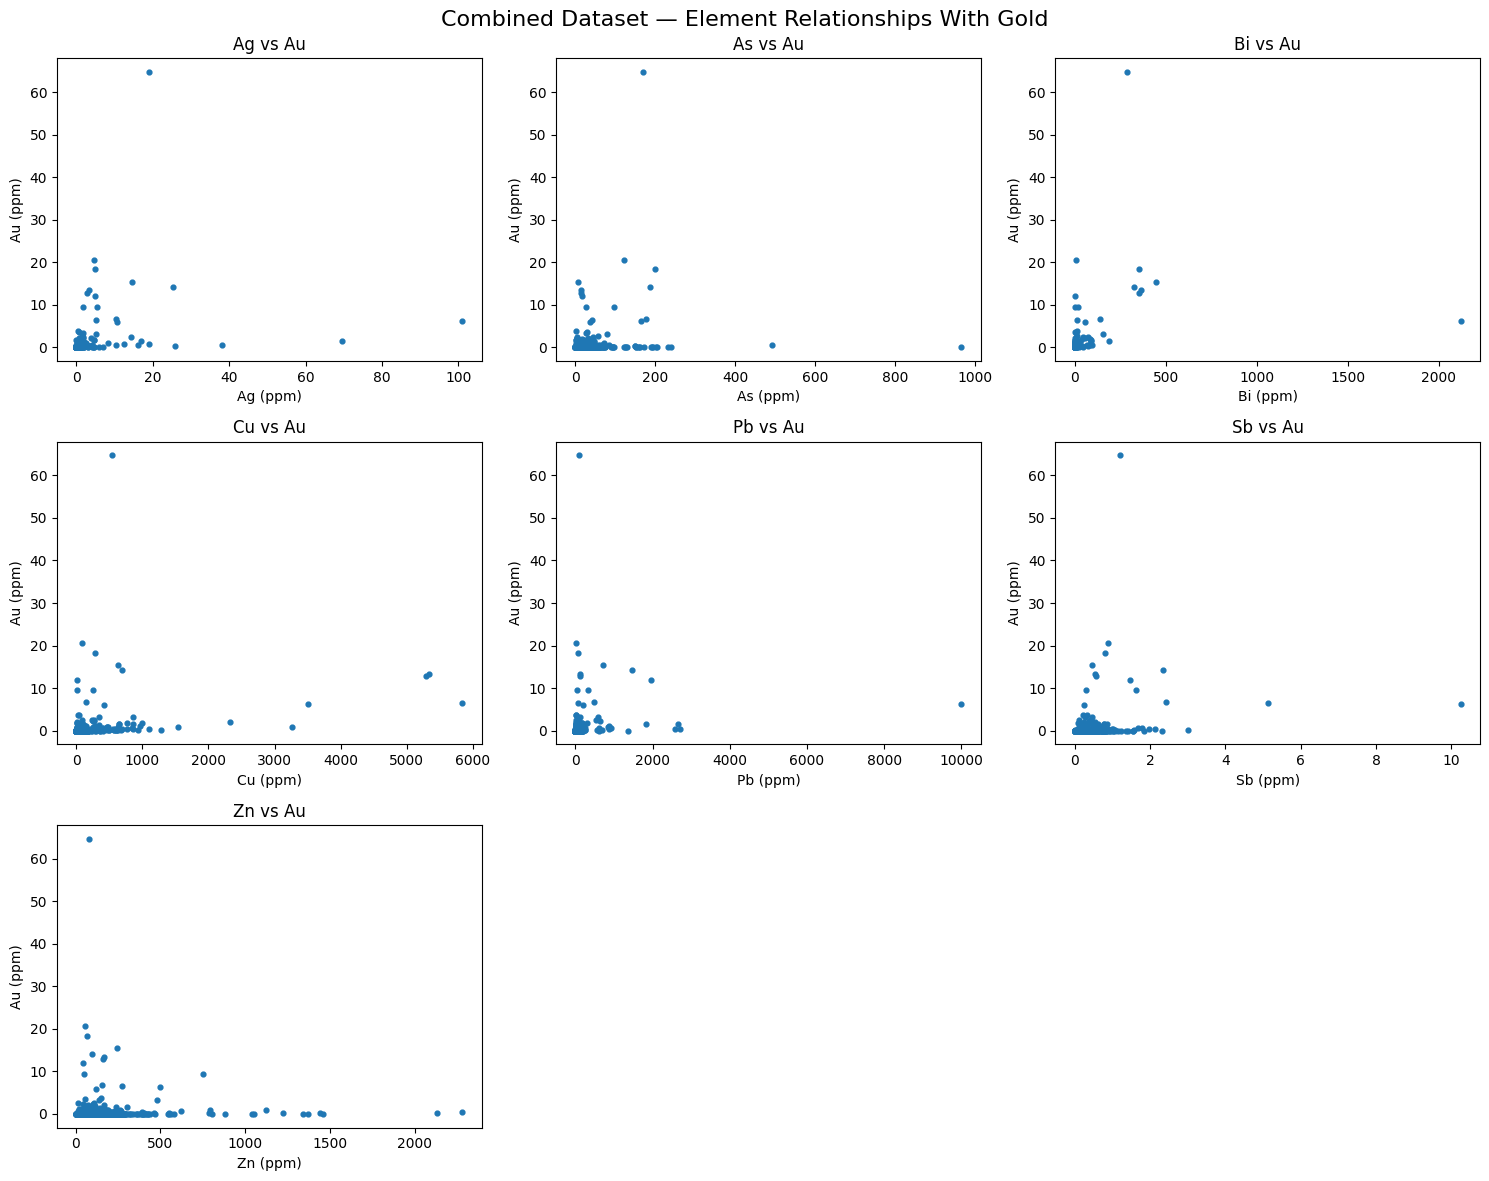

In [30]:
plot_grid_features_vs_gold(combined, "Combined Dataset")

The combined data frame shows similar overall trend.

In [31]:
combined_corr = combined[features].corrwith(combined['Au'])
combined_corr

Ag    0.285563
As    0.208733
Bi    0.336107
Cu    0.297731
Pb    0.159505
Sb    0.249999
Zn    0.031572
dtype: float64

In [32]:
cutoff = 0.02

cutoff_combined  = combined[combined.Au >= cutoff]
combined_corr = cutoff_combined[features].corrwith(cutoff_combined['Au'])
combined_corr

Ag    0.263192
As    0.214920
Bi    0.323421
Cu    0.270170
Pb    0.139100
Sb    0.233954
Zn    0.022416
dtype: float64

The overall correlation reflects the average behavior of the three datasets, and applying a cutoff grade actually worsens these relationships rather than improving them. Zinc and lead show only weak correlation with gold, while the remaining elements exhibit low to moderate correlation, with Bismuth displaying the strongest overall association.